## Preprocess and cluster dataset

Reference: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import sys
sys.path.insert(0, 'D:/GitHub/sample_workflow/')
from HelperFunctions import qc_and_filter, \
                            label_cells

c:\Users\Owner\anaconda3\envs\curate\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Owner\anaconda3\envs\curate\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
# Specify dataset id
ds_id = 'Miller2023'

# Specify base file path
base = f'D:/GitHub/Data/NSCLC/{ds_id}/'

# Specify path to AnnData
adata_path = f'{base}{ds_id}_anndata.h5ad'

# Read AnnData
adata = sc.read_h5ad(adata_path)

In [4]:
adata

AnnData object with n_obs × n_vars = 16487 × 33538
    obs: 'barcode', 'sample'
    var: 'ENSG_id', 'gene_name'

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 23.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.3%
Elapsed time: 16.1 seconds
Percent doublets: 0.017322993252089837


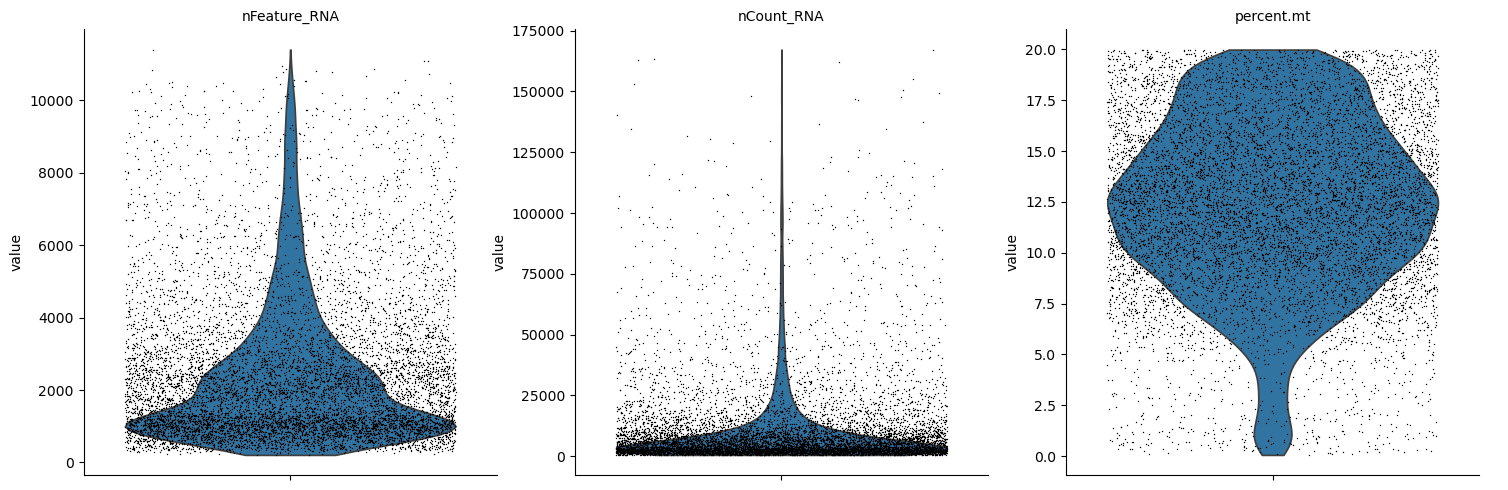

In [5]:
# Filter the data and perform some quality control checks
adata = qc_and_filter(adata)

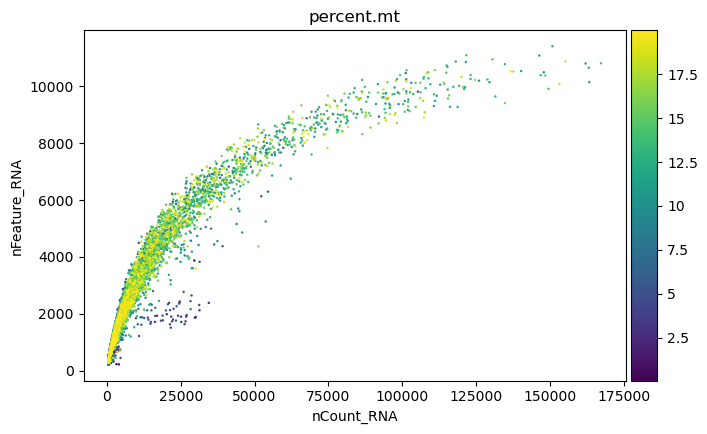

In [6]:
# Consider QC metrics jointly
sc.pl.scatter(adata, "nCount_RNA", "nFeature_RNA", color="percent.mt")

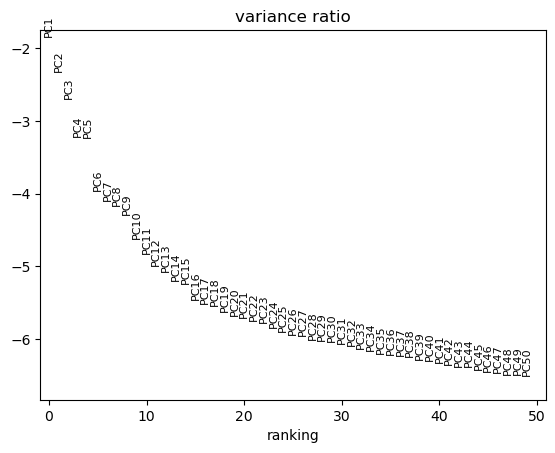

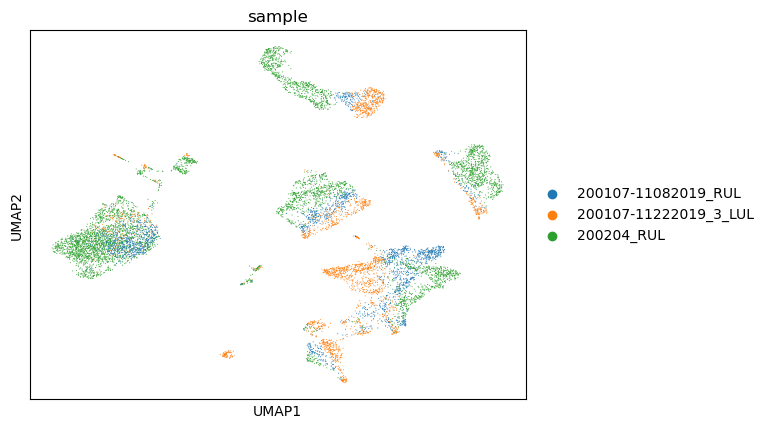

In [7]:
# Label cell types in the AnnData
adata = label_cells(adata)

In [8]:
adata

AnnData object with n_obs × n_vars = 9757 × 21609
    obs: 'barcode', 'sample', 'n_genes', 'nFeature_RNA', 'nCount_RNA', 'total_counts_mt', 'percent.mt', 'DoubletScores'
    var: 'ENSG_id', 'gene_name', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log2norm'
    obsp: 'distances', 'connectivities'

In [11]:
sc.tl.leiden(adata)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17300\3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [12]:
for res in [0.02, 0.5, 2.0]:
        sc.tl.leiden(
            adata, key_added=f"leiden_res_{res:4.2f}", resolution=res
        )

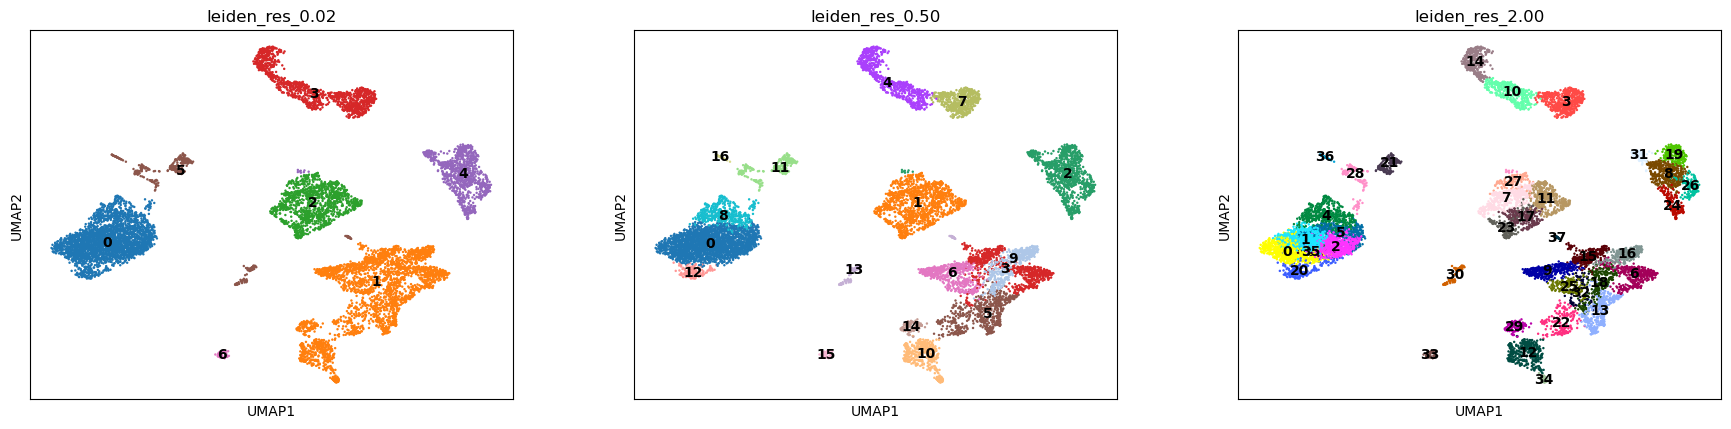

In [13]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

In [ ]:
# Marker genes from scanpy documentation
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var")